In [2]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Dropout, Activation, Flatten
from keras import backend as k
from tensorflow.keras import optimizers
from keras import regularizers
import random

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


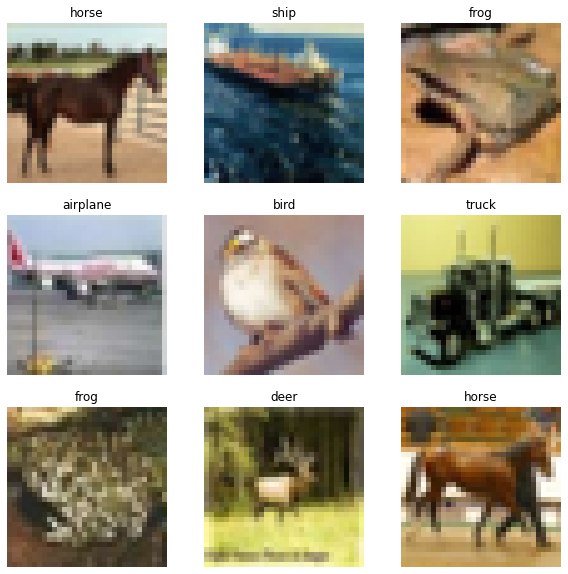

In [4]:
label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  j = random.randint(0, 49999)
  plt.title(label[int(y_train[j][0])])
  # print(y_train[j].dtype)
  plt.axis('off')
  plt.imshow(x_train[j])

In [5]:
x_train = x_train.astype(np.float32)
x_test = y_train.astype(np.float32)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
model = keras.Sequential()
weight_decay = 0.0005
x_shape = [32, 32, 3]
#layer1
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_shape, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
#layer2
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
#layer3
model.add(Conv2D(128, (3, 3), padding='same' , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer4
model.add(Conv2D(128, (3, 3), padding='same' , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
#layer5
model.add(Conv2D(256, (3, 3), padding='same' , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer6
model.add(Conv2D(256, (3, 3), padding='same' , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer7
model.add(Conv2D(256, (3, 3), padding='same' , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
#layer8
model.add(Conv2D(512, (3, 3), padding='same' , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer9
model.add(Conv2D(512, (3, 3), padding='same' , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer10
model.add(Conv2D(512, (3, 3), padding='same' , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
#layer11
model.add(Conv2D(512, (3, 3), padding='same' , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer12
model.add(Conv2D(512, (3, 3), padding='same' , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer13
model.add(Conv2D(512, (3, 3), padding='same' , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
#layer14
model.add(Flatten())
model.add(Dense(512, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#layer15
model.add(Dense(512, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#layer16
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0         
                                                        

In [8]:
with open('model_arch.json', 'w') as f:
  f.write(model.to_json())

In [9]:
datagen = ImageDataGenerator(
  featurewise_center=False, #set input mean to 0 over the dataset
  samplewise_center=False,  #set each sample mean to 0
  featurewise_std_normalization=False,  #divide inputs by std of the dataset
  samplewise_std_normalization=False, #divide each input by its std
  zca_whitening=False,  #apply ZCA whitening
  rotation_range=15,  #randomly rotate images in the range (degrees, 0 to 180)
  width_shift_range=0.1,  #randomly shift images horizontally (fraction of total width)
  height_shift_range=0.1, #randomly shift images vertically (fraction of total height)
  horizontal_flip=True, #randomly flip images
  vertical_flip=False #randomly flip images
)

In [10]:
def lr_scheduler(epoch):
  return learning_rate * (0.5 ** (epoch // lr_drop))

reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

In [11]:
training_epochs = 120
batch_size = 128
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20

datagen.fit(x_train)
sgd = optimizers.SGD(learning_rate=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

In [12]:
print('hyperparameters:')
print('batch size: ', format(batch_size))
print('learning rate: ', format(learning_rate))
print('optimizer: ', format(sgd))

hyperparameters:
batch size:  128
learning rate:  0.1
optimizer:  <keras.optimizer_v2.gradient_descent.SGD object at 0x7f26e6973b50>


In [ ]:
history = model.fit_generator(datagen.flow(x_train, y_train,
                    batch_size=batch_size),
            steps_per_epoch=x_train.shape[0] // batch_size,
            epochs=training_epochs, verbose=2, callbacks=[reduce_lr],
            validation_data=(x_test, y_test))

model.save_weights('cifar10_vgg16.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/120
390/390 - 97s - loss: 34.9210 - accuracy: 0.1654 - val_loss: 24.6247 - val_accuracy: 0.1775 - lr: 0.1000 - 97s/epoch - 249ms/step
Epoch 2/120
390/390 - 60s - loss: 17.3766 - accuracy: 0.2750 - val_loss: 14.7521 - val_accuracy: 0.1112 - lr: 0.1000 - 60s/epoch - 155ms/step
Epoch 3/120
390/390 - 61s - loss: 8.8009 - accuracy: 0.3660 - val_loss: 7.2411 - val_accuracy: 0.1854 - lr: 0.1000 - 61s/epoch - 156ms/step
Epoch 4/120
390/390 - 60s - loss: 4.8718 - accuracy: 0.4421 - val_loss: 4.2258 - val_accuracy: 0.3759 - lr: 0.1000 - 60s/epoch - 155ms/step
Epoch 5/120
390/390 - 60s - loss: 3.0666 - accuracy: 0.5053 - val_loss: 2.8638 - val_accuracy: 0.3972 - lr: 0.1000 - 60s/epoch - 154ms/step
Epoch 6/120
390/390 - 60s - loss: 2.2352 - accuracy: 0.5526 - val_loss: 2.0303 - val_accuracy: 0.5455 - lr: 0.1000 - 60s/epoch - 155ms/step
Epoch 7/120
390/390 - 60s - loss: 1.8414 - accuracy: 0.5929 - val_loss: 1.7969 - val_accuracy: 0.5961 - lr: 0.1000 - 60s/epoch - 155ms/step
Epoch 8/120
390/

In [24]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


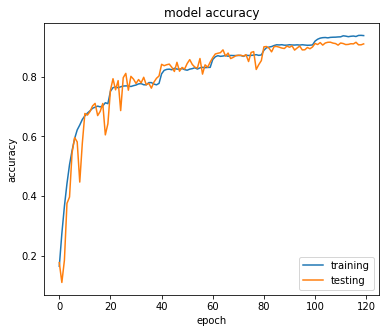

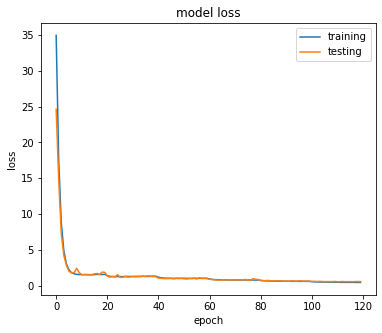

In [25]:
plt.figure(figsize=(6, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'testing'], loc='lower right')
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'testing'], loc='upper right')
plt.show()